# Generating data from Hamilton's Markov Switching Model with Business Fluctuations

In [34]:
import pandas as pd
import numpy as np 
import random as rand 
import matplotlib.pyplot as plt 

### Paramterising model without a constant

In [35]:
P = 0.9008
Q = 0.7606
PHI1 = 0.0898
PHI2 = -0.0186
PHI3 = -0.1743
PHI4 = -0.0839
SIGMA = 0.7962
MU0 = -0.2132
MU1 = 1.1283

### Laying out the data schema

In [36]:
gnp_data = pd.DataFrame({'t':[0,1,2,3],'dy':[1.2, 1.1, 1.1, 1.1],'S':[1, 1, 1, 1],'mu':[MU1,MU1,MU1,MU1]})
gnp_data

,t,dy,S,mu
0,0,1.2,1,1.1283
1,1,1.1,1,1.1283
2,2,1.1,1,1.1283
3,3,1.1,1,1.1283


### Generating datapoints

In [37]:
for t in range(4, 10001):
    #randomly switch regmies as we see fit 

    #gathering relevant previous values
    s_prev= gnp_data.loc[t-1]['S']

    dy_l1 = gnp_data.loc[t-1]['dy']
    mu_l1 = gnp_data.loc[t-1]['mu']

    dy_l2 = gnp_data.loc[t-2]['dy']
    mu_l2 = gnp_data.loc[t-2]['mu']

    dy_l3 = gnp_data.loc[t-3]['dy']
    mu_l3 = gnp_data.loc[t-3]['mu']

    #switching the regime 
    sample = rand.random()
    if s_prev:
        if sample<=P:
            s = 1
        else:
            s = 0
    else:
        if sample<=Q:
            s = 0
        else:
            s=1
    
    #so know based on dy we can compute the right value 
    mu = MU1 if s==1 else MU0
    epsilson = rand.normalvariate(sigma=SIGMA)

    dy = PHI1*(dy_l1-mu_l1)+PHI2*(dy_l2-mu_l2)+PHI3*(dy_l3-mu_l3)+mu+epsilson

    
    new_row = pd.DataFrame({'t':[t],'dy':[dy],'S':[s],'mu':[mu]})

    gnp_data = pd.concat([gnp_data, new_row], ignore_index=True)



gnp_data

,t,dy,S,mu
0,0,1.200000,1,1.1283
1,1,1.100000,1,1.1283
2,2,1.100000,1,1.1283
3,3,1.100000,1,1.1283
4,4,2.327410,1,1.1283
...,...,...,...,...
9996,9996,1.162754,1,1.1283
9997,9997,1.473648,1,1.1283
9998,9998,-1.075947,0,-0.2132
9999,9999,-0.800862,0,-0.2132


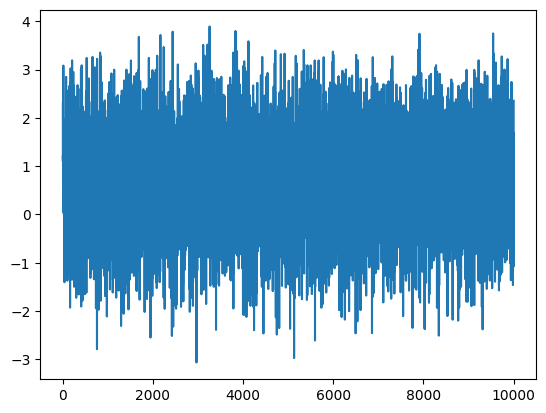

In [38]:
plt.plot(gnp_data['dy'])